In [51]:
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

font = {"family": "YuGothic"}
matplotlib.rc("font", **font)

In [52]:
client60_single = pd.read_csv("../log-single-reverse60/nginx-minis2.csv")
client60_single = client60_single.select_dtypes(include=['int', 'float'])
client60_single_h2_start = client60_single["Time"].min() + 30
client60_single_h2_end = 1675661949 - 30
client60_single_h3_start = 1675662561 + 30
client60_single_h3_end = client60_single["Time"].max() -30
client60_single.dtypes

Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [53]:
client60_simple = pd.read_csv("../log-simple-reverse60/nginx-minis2.csv")
client60_simple = client60_simple.select_dtypes(include=["int", "float"])
client60_simple_h2_start = client60_simple["Time"].min() + 30
client60_simple_h2_end = 1675658358 - 30
client60_simple_h3_start = 1675658963 + 30
client60_simple_h3_end = client60_simple["Time"].max() - 30
client60_simple.dtypes


Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [54]:
def cpu_performance(df: pd.DataFrame, start: int, end: int):
    df_groupby = df[(start <= df["Time"]) & (df["Time"] <= end)].groupby("Time")
    df_groupby = df_groupby.sum()
    return df_groupby


In [55]:
client60_single_h2 = cpu_performance(client60_single, client60_single_h2_start, client60_single_h2_end)
des_single_h2 = client60_single_h2[[r"%usr", r"%system", r"%CPU"]].describe()
des_single_h2.to_csv("server-single-h2.csv")
client60_single_h3 = cpu_performance(client60_single, client60_single_h3_start, client60_single_h3_end)
des_single_h3 = client60_single_h3[[r"%usr", r"%system", r"%CPU"]].describe()
des_single_h3.to_csv("server-single-h3.csv")
result_single = pd.DataFrame()
result_single["HTTP/2\n/single.html"] = client60_single_h2[r"%CPU"].reset_index(drop=True)
result_single["HTTP/3\n/single.html"] = client60_single_h3[r"%CPU"].reset_index(drop=True)
result_single.to_csv("server-describe.csv", index=False)
result_single

,HTTP/2\n/single.html,HTTP/3\n/single.html
0,60.0,80.00
1,45.0,82.17
2,11.0,79.00
3,70.0,81.00
4,56.0,80.00
...,...,...
1810,35.0,79.00
1811,28.0,77.00
1812,52.0,81.00
1813,43.0,81.00


In [56]:
client60_simple_h2 = cpu_performance(client60_simple, client60_simple_h2_start, client60_simple_h2_end)
des_simple_h2 = client60_simple_h2[[r"%usr", r"%system", r"%CPU"]].describe()
des_simple_h2.to_csv("server-simple-h2.csv")
client60_simple_h3 = cpu_performance(client60_simple, client60_simple_h3_start, client60_simple_h3_end)
des_simple_h3 = client60_simple_h3[[r"%usr", r"%system", r"%CPU"]].describe()
des_simple_h3.to_csv("server-simple-h3.csv")
result_simple = pd.DataFrame()
result_simple["HTTP/2\n/simple.html"] = client60_simple_h2[r"%CPU"].reset_index(drop=True)
result_simple["HTTP/3\n/simple.html"] = client60_simple_h3[r"%CPU"].reset_index(drop=True)
result_simple.to_csv("server-describe.csv", index=False)
result_simple


,HTTP/2\n/simple.html,HTTP/3\n/simple.html
0,34.0,36.0
1,34.0,36.0
2,32.0,38.0
3,34.0,39.0
4,34.0,37.0
...,...,...
281,34.0,37.0
282,34.0,35.0
283,33.0,36.0
284,34.0,41.0


In [57]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 6))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
result = pd.concat([result_simple, result_single], axis=1)


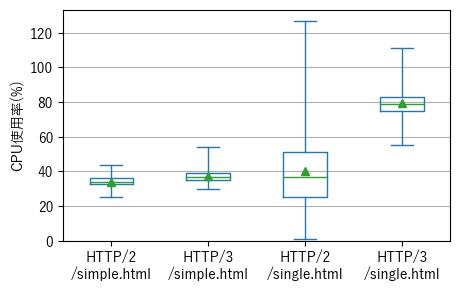

In [58]:
plot = result.plot.box(
    showmeans=True, ylabel="CPU使用率(%)", figsize=(5, 3), whis=[0, 100]
)
plot.set_ylim(0)
plot.grid(which="major", axis="y")
